In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'

In [3]:
def function(x):
    return x**4 - 3 * x**2 + 5*x - 3 

In [4]:
def derivative_function(x):
    return 4 * x**3 - 6 * x + 5

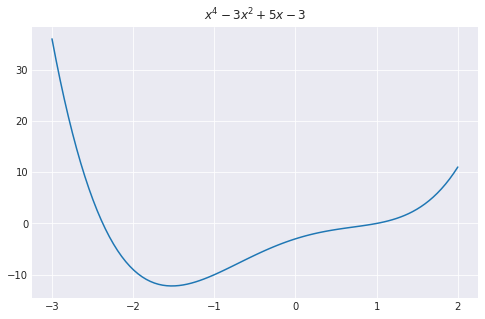

In [5]:
x = np.linspace(-3, 2, 100)
y = [function(i) for i in x]
plt.plot(x, y)
plt.title("$x^4 - 3x^2 + 5x - 3$");

Метод Ньютона:

In [9]:
def seek_cross_newton(x_l, x_r, eps):
    if function(x_l) * function(x_r) > 0:
        return "none"
    
    x_prev = x_l
    x_curr = x_prev - function(x_prev) / derivative_function(x_prev)
    if function(x_prev) * function(x_curr) < 0:
        x_prev = x_r
        x_curr = x_prev - function(x_prev) / derivative_function(x_prev)
        
    list_x_new = []
    while abs(x_curr - x_prev) > eps:
        x_prev = x_curr
        x_curr = x_prev - function(x_prev) / derivative_function(x_prev)
        list_x_new.append(x_curr)
    return list_x_new

In [24]:
def print_result(root):
    print('Количество иттераций: ', len(root))
    print('X = ', root[-1])

In [29]:
print_result(seek_cross_newton(-3, 0, 1e-6))

Количество иттераций:  4
X =  -2.374423763209308


In [32]:
print_result(seek_cross_newton(0, 3, 1e-6))

Количество иттераций:  4
X =  1.0000000000000246


Метод половиного деления:

In [15]:
def seek_cross_binary(x_l, x_r, eps):
    if function(x_l) * function(x_r) > 0:
        return "none"
    
    x_new = x_l - 50 * eps
    list_x_new = []
    while abs(function(x_new)) > eps:
        if function(x_l) > 0:
            x_new = (x_l + x_r) / 2
            if function(x_new) > 0:
                x_l = x_new
            else:
                x_r = x_new
                list_x_new.append(x_new)
        else:
            x_new = (x_l + x_r) / 2
            if function(x_new) < 0:
                x_l = x_new
            else:
                x_r = x_new
            list_x_new.append(x_new)
    return list_x_new

In [30]:
print_result(seek_cross_binary(-3, 0, 1e-6))

Количество иттераций:  11
X =  -2.3744237422943115


In [31]:
print_result(seek_cross_binary(0, 3, 1e-6))

Количество иттераций:  22
X =  0.9999997615814209
